<a href="https://colab.research.google.com/github/AnasAkenoun/Non-linear-Schrodinger-equation_Split-step-method/blob/main/NLSE_Solitons_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-14-e7e48899d47c>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  D[i] = (-1/2) * ((psi0[i-1] - 2*psi0[i] + psi0[i+1]) / (2*dx**2))
<ipython-input-14-e7e48899d47c>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  N_[i] = s * ((np.abs(psi0[i])**2) * psi0[i])


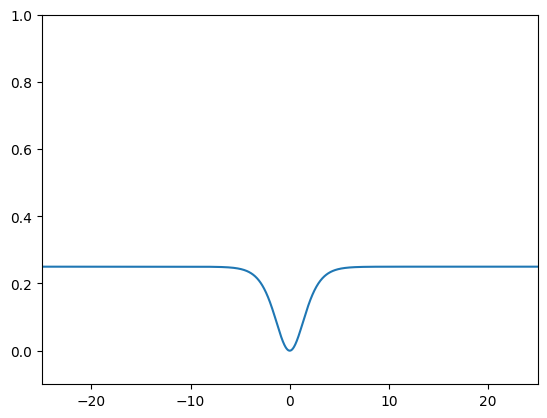

In [14]:

############################################ grey soliton #############################################################################

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
L = 50
N = 2000
dx = L/(N+1)
x = -L/2+dx*np.arange(1,N+1)
dt = 0.01
T = 20
t = np.arange(0, T, dt)

# Initial condition: gray soliton
s = 1  ### gray soliton
eta = 0.5

theta = (1/2)*math.pi
h_ = (6.26*10**-34)/2*math.pi

psi0 = eta*np.exp((-1j)*(eta**2)*t)*(math.cos(theta)+1j*math.sin(theta)*np.tanh((x+eta*t*math.cos(theta))*(eta*math.sin(theta))))

# Define psi function
D = np.zeros((N,))
N_ = np.zeros((N,))
def psi(x, t):
    for i in range(1, N-1):
        D[i] = (-1/2) * ((psi0[i-1] - 2*psi0[i] + psi0[i+1]) / (2*dx**2))
        N_[i] = s * ((np.abs(psi0[i])**2) * psi0[i])
    return np.exp(-1j*(D + N_)*t/h_) * psi0

# Split-step method
psi1 = psi0.copy()
psi2 = psi1.copy()
psi3 = psi2.copy()


def create_animation(x,data,yrange=[-0.01, 1],interval=100):
  global psi1, psi2, psi3
  fig, ax = plt.subplots()
  line, = ax.plot(x, np.abs(psi(x,t))**2)
  ax.set_xlim([-L/2, L/2])
  ax.set_ylim([-0.1, 1])

  for i in range(len(t)-1):
    # Step 1
    psi1 = np.fft.fft(psi1)
    psi1 = np.exp(-0.5j*dt*np.fft.fftfreq(N)**2) * psi1
    psi1 = np.fft.ifft(psi1)

    # Step 2
    psi2 = psi1 * np.exp(1j*dt*s*np.abs(psi1)**2)

    # Step 3
    psi3 = np.fft.fft(psi2)
    psi3 = np.exp(-0.5j*dt*np.fft.fftfreq(N)**2) * psi3
    psi3 = np.fft.ifft(psi3)

    # Update solution
    if i == len(t)-1:
      psi1 = psi3
      # Plot solution
      line.set_ydata(np.abs(psi1)**2)
    #return animation.FuncAnimation(fig,update,frames=data.shape[0],interval=interval,blit=True)
  return line,



ani1=create_animation(x,np.abs(psi(x,t))**2,interval=50,yrange=[-20,20]);

plt.show()


In [15]:
from IPython.display import HTML ### Linux users
HTML(ani1.to_html5_video())

AttributeError: 'tuple' object has no attribute 'to_html5_video'

<ipython-input-9-0315549ac2d9>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  D[i] = (-1/2) * ((psi0[i-1] - 2*psi0[i] + psi0[i+1]) / (dx**2))
<ipython-input-9-0315549ac2d9>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  N_[i] = s * ((np.abs(psi0[i])**2) * psi0[i])


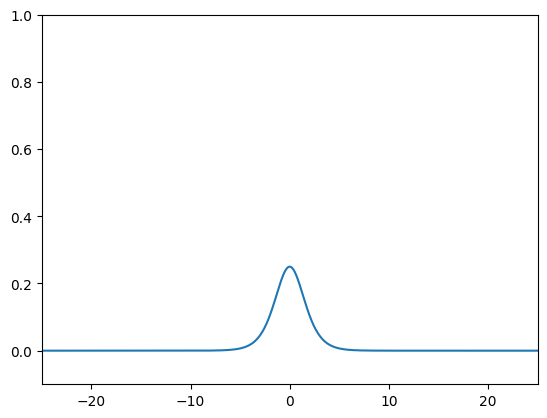

In [9]:
################################################### Bright soliton #####################################################################
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
L = 50
N = 2000
dx = L/(N+1)
x = -L/2+dx*np.arange(1,N+1)
dt = 0.01
T = 20
t = np.arange(0, T, dt)

# Initial condition: bright soliton
s = -1  ### Bright soliton
eta = 0.5
v=-5

h_ = (6.26*10**-34)/2*math.pi
psi0 = eta*np.exp(1j*v*x)/np.cosh(eta*x)


# Define psi function
D = np.zeros((N,))
N_ = np.zeros((N,))
def psi(x, t):
    for i in range(1, N-1):
        D[i] = (-1/2) * ((psi0[i-1] - 2*psi0[i] + psi0[i+1]) / (dx**2))
        N_[i] = s * ((np.abs(psi0[i])**2) * psi0[i])
    return np.exp(-1j*(D + N_)*t/h_) * psi0

# Split-step method
psi1 = psi0.copy()
psi2 = psi1.copy()
psi3 = psi2.copy()

def update(frame):
    global psi1, psi2, psi3

    for i in range(len(t)-1):
        # Step 1
        psi1 = np.fft.fft(psi1)
        psi1 = np.exp(-0.5j*dt*np.fft.fftfreq(N)**2) * psi1
        psi1 = np.fft.ifft(psi1)

        # Step 2
        psi2 = psi1 * np.exp(1j*dt*s*np.abs(psi1)**2)

        # Step 3
        psi3 = np.fft.fft(psi2)
        psi3 = np.exp(-0.5j*dt*np.fft.fftfreq(N)**2) * psi3
        psi3 = np.fft.ifft(psi3)

        # Update solution
        if i == len(t)-1:
            psi1 = psi3

    # Plot solution
    line.set_ydata(np.abs(psi1)**2)

    return line,

fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psi(x,t))**2)
ax.set_xlim([-L/2, L/2])
ax.set_ylim([-0.1, 1])

ani2 = FuncAnimation(fig, update, frames=np.arange(0, T, dt), blit=True)

plt.show()


In [10]:
from IPython.display import HTML ### Linux users
HTML(ani2.to_html5_video())

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpu22fdy2p/temp.m4v']' returned non-zero exit status 255.

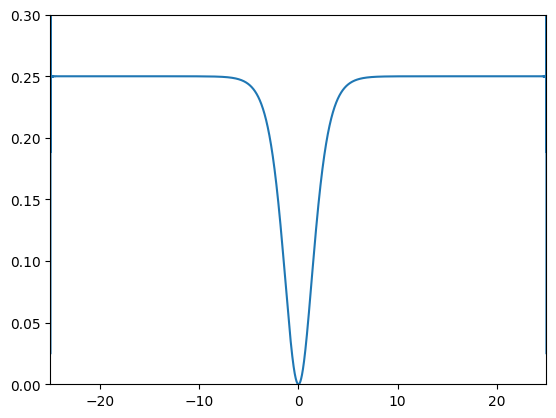

In [13]:
###################################### dark soliton ##################################
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
L = 50
N = 20000
dx = L/(N+1)
x = -L/2+dx*np.arange(1,N+1)
dt = 0.01
T = 20
t = np.arange(0, T, dt)

# Initial condition: dark soliton
s = 1
eta = 0.5
theta = 0.5*np.pi
h_ = (6.26*10**-34)/2*math.pi
psi0 = eta * np.tanh(eta*x)

# Define psi function
D = np.zeros((N,))
N_ = np.zeros((N,))
def psi(x, t):
    for i in range(1, N-1):
        D[i] = (-1/2) * ((psi0[i-1] - 2*psi0[i] + psi0[i+1]) / (dx**2))
        N_[i] = s * ((np.abs(psi0[i])**2) * psi0[i])
    return np.exp(-1j*(D + N_)*t/h_) * psi0

# Split-step method
psi1 = psi0.copy()
psi2 = psi1.copy()
psi3 = psi2.copy()

def update(frame):
    global psi1, psi2, psi3

    for i in range(len(t)):
        # Step 1
        psi1 = np.fft.fft(psi1)
        psi1 = np.exp(-0.5j*dt*np.fft.fftfreq(N)**2) * psi1
        psi1 = np.fft.ifft(psi1)

        # Step 2
        psi2 = psi1 * np.exp(1j*dt*s*np.abs(psi1)**2)

        # Step 3
        psi3 = np.fft.fft(psi2)
        psi3 = np.exp(-0.5j*dt*np.fft.fftfreq(N)**2) * psi3
        psi3 = np.fft.ifft(psi3)

        # Update solution
        if i == len(t)-1:
            psi1 = psi3

    # Plot solution
    line.set_ydata(np.abs(psi1)**2)

    return line,

fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psi0)**2)
ax.set_xlim([-L/2, L/2])
ax.set_ylim([0, 0.3])

ani3 = FuncAnimation(fig, update, frames=np.arange(0, T, dt), blit=True)
plt.show()

In [16]:
from IPython.display import HTML ### Linux users
HTML(ani3.to_html5_video())

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20000,) and arg 1 with shape (2000,).